# TP 2. PARTIE 2. PDA - QDA. k-NN

Souhail AKIRAR

## Plan :

   [- LDA-QDA](#1)
   
   [- Dataset Vowel](#2)
   
   [- k-NN](#3)   

In [2]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import pandas as pd
import seaborn as sns


# 1. LDA-QDA


In [3]:
from sklearn import datasets
iris = datasets.load_iris()

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


names = ["Naive Bayes", "LDA", "QDA"]
classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [5]:
from sklearn.datasets import load_iris
# loading the iris dataset
iris = load_iris()
X = iris.data[: , [1,3]]
y = iris.target
h=.02

FileNotFoundError: [Errno 2] No such file or directory: '../Figures/sklearn_examples_iris.png'

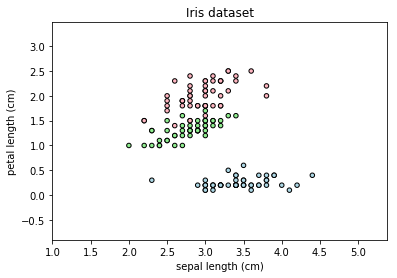

In [6]:
cmap_bold = ListedColormap(['#ADD8E6', '#90EE90','#FFB6C1'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Iris dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.savefig("../Figures/sklearn_examples_iris")

In [ ]:
figure = plt.figure(figsize=(20, 5))
h = .02  # step size in the mesh
i=0
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

for name, clf in zip(names, classifiers):
    i += 1
    ax = plt.subplot(1, len(classifiers), i)
    clf.fit(X, y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    Z_p = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    
    #print(Z_p.shape)
    
    # Put the result into a color plot
    Z = np.argmax(Z_p,axis=1) + 1
    Z = Z.reshape(xx.shape)
   
    ax.contourf(xx, yy, Z, cmap=cmap_bold, alpha=0.2)

    # Plot also the points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    

In [ ]:
len(np.arange(x_min, x_max, h))*len(np.arange(y_min, y_max, h))

In [ ]:
np.c_[xx.ravel(), yy.ravel()].shape

In [ ]:
Z = np.argmax(Z_p,axis=1) + 1
print(len(np.c_[xx.ravel(), yy.ravel()]))
print(Z.shape[0])

# 2. Dataset Vowel


https://web.stanford.edu/~hastie/ElemStatLearn/data.html

In [20]:
train=pd.read_csv('vowel.train.csv', sep=',', index_col=0)
train.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
2,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
3,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
4,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
5,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396


In [21]:
test=pd.read_csv('vowel.test.csv', sep=',', index_col=0)
test.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-1.149,-0.904,-1.988,0.739,-0.060,1.206,0.864,1.196,-0.300,-0.467
2,2,-2.613,-0.092,-0.540,0.484,0.389,1.741,0.198,0.257,-0.375,-0.604
3,3,-2.505,0.632,-0.593,0.304,0.496,0.824,-0.162,0.181,-0.363,-0.764
4,4,-1.768,1.769,-1.142,-0.739,-0.086,0.120,-0.230,0.217,-0.009,-0.279
5,5,-2.671,3.155,-0.514,0.133,-0.964,0.234,-0.071,1.192,0.254,-0.471


Répéter l'analyse faite sur le dataset iris avec les données vowel.

In [42]:
print(train.shape)

(528, 11)


Il y a 528 observations de 11 classes sur le jeu de données de Train

In [41]:
print(test.shape)

(462, 11)


Il y a 462 observations de 11 classes sur le jeu de données de Test

In [46]:
np.unique(train['y'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

c'est un problème de classification multi-class avec 11 classes. on vérifie si le nombre d'observations est bien équilibré


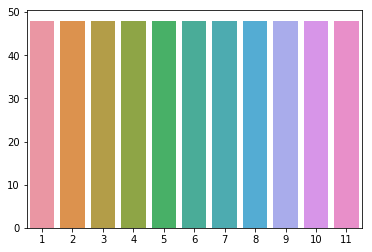

In [47]:
sns.barplot(np.unique(train["y"]),train.groupby("y").count().values[:,0])

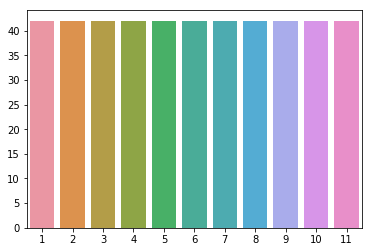

In [25]:
sns.barplot(np.unique(test["y"]),test.groupby("y").count().values[:,0])

Les classes sont équilibrés

In [55]:
train.groupby('y').count().values[0,:]
print(np.unique(train['y']))
print(train.groupby('y').count())

[ 1  2  3  4  5  6  7  8  9 10 11]
    x.1  x.2  x.3  x.4  x.5  x.6  x.7  x.8  x.9  x.10
y                                                    
1    48   48   48   48   48   48   48   48   48    48
2    48   48   48   48   48   48   48   48   48    48
3    48   48   48   48   48   48   48   48   48    48
4    48   48   48   48   48   48   48   48   48    48
5    48   48   48   48   48   48   48   48   48    48
6    48   48   48   48   48   48   48   48   48    48
7    48   48   48   48   48   48   48   48   48    48
8    48   48   48   48   48   48   48   48   48    48
9    48   48   48   48   48   48   48   48   48    48
10   48   48   48   48   48   48   48   48   48    48
11   48   48   48   48   48   48   48   48   48    48


In [30]:
y_train = train.values[:,0]
X_train = train.values[:,1:]
print(X_train.shape)


(528, 10)


In [31]:
y_test = test.values[:,0]
X_test = test.values[:,1:]
print(X_test.shape)

(462, 10)


# Machine Learning


On va déterminer quelle méthode est meilleure :

# Naive Bayes , LDA , QDA

https://openclassrooms.com/courses/initiez-vous-au-machine-learning/tp-entrainez-le-modele-des-k-plus-proches-voisins-k-nn

In [80]:
NB = GaussianNB()
NB_fit=NB.fit(X=X_train,y=y_train)
print("le score sur le train est ",accuracy_score(NB_fit.predict(X_train),y_train))
print("le score sur le test est",accuracy_score(NB_fit.predict(X_test),y_test))

le score sur le train est  0.7196969696969697
le score sur le test est 0.461038961038961


In [81]:
lda = LinearDiscriminantAnalysis()
LDA_fit=lda.fit(X=X_train,y=y_train)
print("le score sur le train est ",accuracy_score(lda_fit.predict(X_train),y_train))
print("le score sur le test est",accuracy_score(lda_fit.predict(X_test),y_test))



le score sur le train est  0.6837121212121212
le score sur le test est 0.44372294372294374


In [82]:
qda = QuadraticDiscriminantAnalysis()
qda_fit = qda.fit(X=X_train, y=y_train)

print("le score sur le train est ",accuracy_score(qda_fit.predict(X_train),y_train))
print("le score sur le test est ",accuracy_score(qda_fit.predict(X_test),y_test))

le score sur le train est  0.9886363636363636
le score sur le test est  0.47186147186147187


On remarque que le meilleur score d'accuracy est celui de QDA.

<img src="https://media1.giphy.com/media/LNXivXzMwd7W0/giphy.gif" width = 300>
<a id="3"></a> 
 
# k-NN

On utilise l'algorithme k-NN pour différents k allant de 1 à 50 , et on compare ses performances avec les méthodes précédentes.

In [112]:
acc_train = []
acc_test = []
for k in np.arange(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_fit = knn.fit(X=X_train,y=y_train)
    acc_train.append(accuracy_score(knn_fit.predict(X_train),y_train))
    acc_test.append(accuracy_score(knn_fit.predict(X_test),y_test))
    accuracy_score(knn_fit.predict(X_test),y_test)
k_hat = np.argmax(acc_test)
print("le score train est", ("%.3f" % acc_train[k_hat]))
print("le score test",("%.3f" % acc_test[k_hat]))
print("k egale 1 +",(k_hat), "= 6" ) # car on commence de 0

le score train est 0.977
le score test 0.608
k egale 1 + 5 = 6


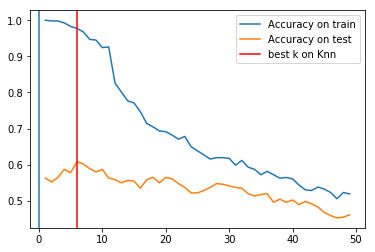

In [113]:
plt.plot(np.arange(1,50),acc_train,label="Accuracy on train")
plt.plot(np.arange(1,50),acc_test,label="Accuracy on test")
plt.axvline(np.arange(1,50)[k_hat],label="best k on Knn ", color='red')
plt.axvline()
plt.legend()





#### On conclus que l'algorithme K-NN est meilleur et précis car le score d'accuraccy est plus grand par Rapport au autres méthodes précédentes.